#### Pendientes

In [ ]:
#TODO 1: Revisar si las distribuciones vienen de una normal
#TODO 2: Revisar si estas diferencias son stadisticamente significativas
#TODO 3: Quitar las stopwords y revisar si se mantiene esta distribucion
#TODO 4: Si la distribucion no se mantiene, mantener pronombres en los stopwords.
#TODO 5: sacar caracteristicas TFIDF 
#TODO 6: Entrenar 3 modelos con esas caracteristicas XGBoost,LightGBM, Logistic Regression
#TODO 7: Sacar caracteristicas con BERT
#TODO 8: Entrenar 3 modelos con esas caracteristicas XGBoost,LightGBM, Logistic Regression
#TODO 9: realizar clasificacion explicita con 2 LLMs, pre-entrenadas y sin pre-entreno
#TODO 10: Comparar resultados

#### Config & Data ingestion

In [117]:
import os 
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS


In [118]:
sns.set_theme(style ="ticks",context="paper", rc={'figure.figsize':(8,4)})


In [119]:
#Data Imports
data_path = Path(os.getcwd()).parent / "data"
train_path = data_path / "dreaddit-train.csv"
test_path = data_path / "dreaddit-test.csv"

train = pd.read_csv(train_path)
test =  pd.read_csv(test_path)
df = pd.concat([train,test])

In [120]:

print(f"There are {df.shape[0]} entries")
print(f"Dataset have {df.shape[1]} features")

There are 3553 entries
Dataset have 116 features


There is a confirmation that labels are balanced


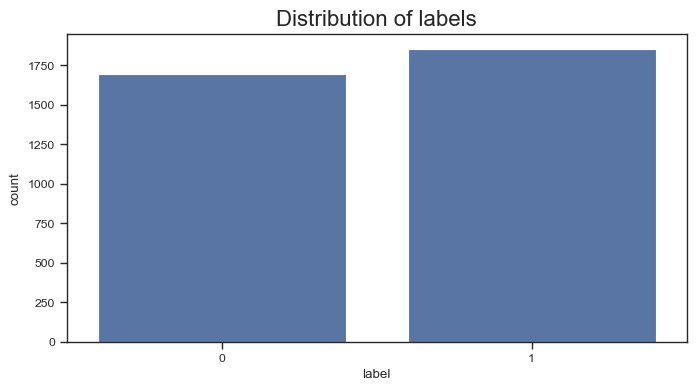

In [121]:
ax= sns.barplot(df.value_counts("label").reset_index(), x="label", y="count")
ax.set_title('Distribution of labels', fontsize=16)
print("There is a confirmation that labels are balanced")


In [122]:
#lowercase all the texts
df.text = df.text.str.lower()

#### **Uso de lenguage en singular entre los labels**

¿Los casos positivos para ansiedad tienen un mayor uso de pronombres en sigular?

In [123]:
singular_pronouns = ["i ", "you", "he","she","it", "me", "him","her", "my","mine",
                     "your, yours", "his","her", "hers", "its","myself"]
plural_pronouns = ["we", "they", "us","them", "our", "ours", "their","theirs"]

In [124]:
#Counts the number of singular and plural pronouns in each text
df["count_singular"] = 0
df["count_plural"] = 0

for t in singular_pronouns:
    df["count_singular"] +=df.text.str.count(t)

for t in plural_pronouns:
    df["count_plural"] += df.text.str.count(t)

Text(0.5, 1.0, 'Count of plural pronouns')

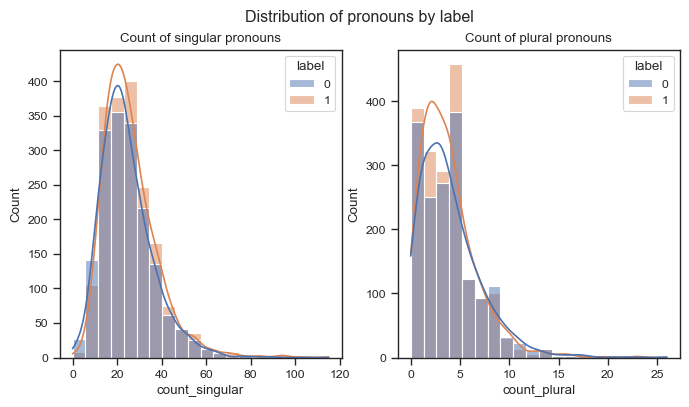

In [125]:
fig, axes = plt.subplots(1,2)
fig.suptitle("Distribution of pronouns by label")
ax1 = sns.histplot(df,x="count_singular", bins=20,hue="label", kde=True, ax=axes[0])
ax1.set_title("Count of singular pronouns")
ax2 =sns.histplot(df,x="count_plural", bins=20,hue="label", kde=True, ax=axes[1])
ax2.set_title("Count of plural pronouns")


In [126]:
#ax = sns.FacetGrid(data=df,col="subreddit",hue="label")
#ax.map(sns.histplot,"count_singular")

In [133]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import punctuation

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


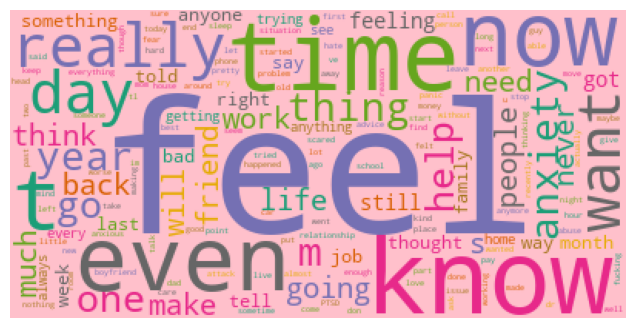

In [31]:


cloud_stress=WordCloud(stopwords=STOPWORDS, background_color='pink',
                      colormap="Dark2",collocations=False,
                      ).generate(" ".join(df.query("label ==1").text.values))

cloud_noStress=WordCloud(stopwords=STOPWORDS, background_color='pink',
                      colormap="Dark2",collocations=False,
                      ).generate(" ".join(df.query("label ==0").text.values))

plt.axis('off')
plt.imshow(cloud_stress)



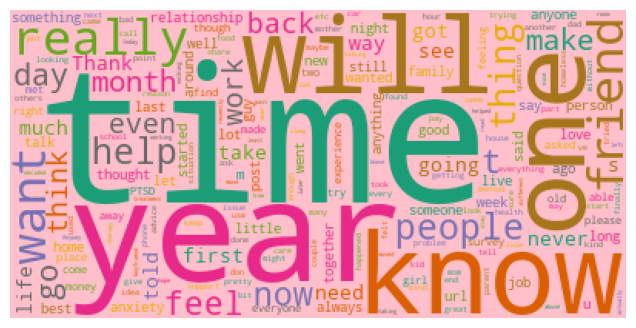

In [32]:
plt.axis('off')
plt.imshow(cloud_noStress)